In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd; pd.set_option('mode.chained_assignment',None)
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import copy
import datetime
import time
import csv
from pandas.core.common import flatten

import random
import math
import timeit
import warnings; warnings.simplefilter('ignore')


In [2]:

lst_eps = [round(np.log(val),4) for val in range(2,8)] # [2, 3, 4, 5, 6, 7] # 
print('epsilon=', lst_eps)

epsilon= [0.6931, 1.0986, 1.3863, 1.6094, 1.7918, 1.9459]


In [3]:
common_path = './results/syn/'

In [3]:
common_path = './results/real/'
oracle_path = './results/oracles/'

In [ ]:
ds_path = 'nursery/'

In [ ]:
ds_path = 'adult/'

In [ ]:
ds_path = 'fimu/'

In [4]:
ds_path = 'sensors/'

In [ ]:
ds_path = '500K_10D_NU/'

In [5]:
priv_regime = 'high/'

In [ ]:
priv_regime = 'gen/'

In [6]:
grr_flnm = common_path + ds_path + priv_regime + 'final_results_rs_fd_grr.csv'
ouez_flnm = common_path + ds_path + priv_regime + 'final_results_oue_z.csv'
spl_flnm = common_path + ds_path + priv_regime + 'final_results_spl.csv'
smp_flnm = common_path + ds_path + priv_regime + 'final_results_smp.csv'
adp_flnm = common_path + ds_path + priv_regime + 'final_results_adp.csv'
rpr_flnm = common_path + ds_path + priv_regime + 'final_results_rappor.csv'
hdmd_flnm = common_path + ds_path + priv_regime + 'final_results_hadamard.csv'
sarve_flnm = common_path + ds_path + priv_regime + 'final_results_sarve.csv'
print (sarve_flnm)

/home/gatha/development/ldp-protocols-mobility-cdrs/papers/[2]/results/real/sensors/high/final_results_sarve.csv


In [7]:
common_imgs = './results/'

In [ ]:
common_imgs = './results/imgs/'

In [9]:
ds_name = 'sensors'
img_priv = 'highpriv'

In [ ]:
ds_name = '500K_10D_NU'
img_priv = 'genpriv'

In [10]:
# img files
all_img = common_imgs + ds_name + "_" + img_priv + "_fo.svg"
print (all_img)

/home/gatha/development/ldp-protocols-mobility-cdrs/papers/[2]/results/sensors_highpriv_fo.svg


In [11]:
vhs_rs_fd_adp = pd.read_csv(adp_flnm, header=None, index_col=0)
vhs_rs_fd_grr = pd.read_csv(grr_flnm, header=None, index_col=0)
vhs_rs_fd_oue_z = pd.read_csv(ouez_flnm, header=None, index_col=0)
vhs_spl_adp = pd.read_csv(spl_flnm, header=None, index_col=0)
vhs_smp_adp = pd.read_csv(smp_flnm, header=None, index_col=0)

vhs_rs_fd_rpr = pd.read_csv(rpr_flnm, header=None, index_col=0)
vhs_rs_fd_hd = pd.read_csv(hdmd_flnm, header=None, index_col=0)
vhs_rs_fd_sarve = pd.read_csv(sarve_flnm, header=None, index_col=0)


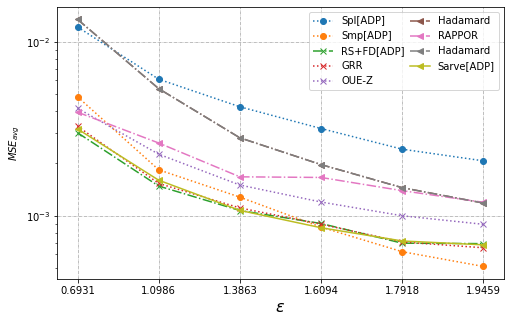

In [12]:
# plot adp vs improv
plt.figure(figsize=(8,5))
plt.grid(color='grey', linestyle='dashdot', linewidth=0.5)
plt.plot(vhs_spl_adp.mean(), label='Spl[ADP]',marker='o',linestyle='dotted')
plt.plot(vhs_smp_adp.mean(), label='Smp[ADP]',marker='o',linestyle='dotted')
plt.plot(vhs_rs_fd_adp.mean(), label='RS+FD[ADP]', marker='x',linestyle='dashdot')
plt.plot(vhs_rs_fd_grr.mean(), label='GRR', marker='x',linestyle='dotted')
plt.plot(vhs_rs_fd_oue_z.mean(), label='OUE-Z', marker='x',linestyle='dotted')
plt.plot(vhs_rs_fd_hd.mean(), label='Hadamard',marker='<',linestyle='dashdot')
plt.plot(vhs_rs_fd_rpr.mean(), label='RAPPOR',marker='<',linestyle='dashdot')
plt.plot(vhs_rs_fd_hd.mean(), label='Hadamard',marker='<',linestyle='dashdot')
plt.plot(vhs_rs_fd_sarve.mean(), label='Sarve[ADP]',marker='<')

plt.plot(range(1,len(lst_eps)+1),np.zeros(6), color='w', alpha=0, label=' ')

plt.yscale('log')
plt.xlabel('$\epsilon$', fontsize=16)
plt.ylabel('$MSE_{avg}$')
plt.xticks(range(1,len(lst_eps)+1), lst_eps)#['ln('+str(val)+')' for val in range(2,8)]
#plt.ylim([3e-5,0.3e-2])
plt.legend(ncol=2, columnspacing=0.5);
plt.savefig(all_img, dpi=600)